# `flavio` in 10 minutes

David M. Straub

SMEFT Tools 2019, IPPP Durham

- Docs: https://flav-io.github.io/
- Repo: https://github.com/flav-io/flavio
- Paper: https://arxiv.org/abs/1810.08132

## Installation & import

Installation is trivial: `python3 -m pip install flavio --user`

In [1]:
import flavio

## Observables

Choose one here: https://flav-io.github.io/docs/observables.html

In [2]:
flavio.Observable['BR(Bs->mumu)']

### Observable `BR(Bs->mumu)`

Observable: $\overline{\text{BR}}(B_s\to \mu^+\mu^-)$

Description: Time-integrated branching ratio of $B_s\to \mu^+\mu^-$.

Theory prediction: `<function flavio.physics.bdecays.bll.bqll_obs_function.<locals>.<lambda>(wc_obj, par)>`

## Predictions: high-level functions

In [3]:
flavio.sm_prediction('BR(Bs->mumu)')

3.6677553688451335e-09

In [4]:
flavio.sm_uncertainty('BR(Bs->mumu)')

1.3876233505714032e-10

These are shorthands for more low-level methods:

In [5]:
flavio.Observable['BR(Bs->mumu)'].prediction_central(
    flavio.default_parameters,
    flavio.WilsonCoefficients()
)

3.6677553688451335e-09

## More on uncertainties

In [6]:
import flavio.plots as fpl
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

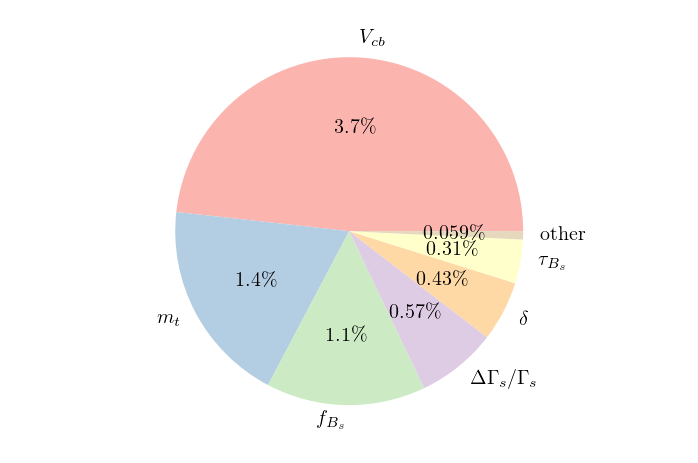

In [7]:
err = flavio.sm_error_budget('BR(Bs->mumu)')
fpl.error_budget_pie(err);

In [8]:
flavio.sm_covariance(['BR(Bs->mumu)', 'BR(B0->mumu)'])

array([[2.80383518e-20, 6.75943520e-22],
       [6.75943520e-22, 1.26692764e-22]])

## Observables with arguments

In [9]:
flavio.Observable['<Rmue>(B0->K*ll)']

### Observable `<Rmue>(B0->K*ll)`

Observable: $\langle R_{\mu e} \rangle(B^0\to K^{\ast 0}\ell^+\ell^-)$

Description: Ratio of partial branching ratios of $B^0\to K^{\ast 0}\mu^+ \mu^-$ and $B^0\to K^{\ast 0}e^+ e^-$

Arguments: `q2min`,`q2max`

Theory prediction: `<function flavio.physics.bdecays.bvll.observables.bvll_obs_int_ratio_leptonflavour.<locals>.fct(wc_obj, par, q2min, q2max)>`

In [10]:
flavio.sm_prediction('<Rmue>(B0->K*ll)', q2min=1.1, q2max=6)

0.9964411976226506

## Measurements

In [11]:
flavio.Observable['<Rmue>(B0->K*ll)'].get_measurements()

['LHCb RK* 2017', 'Belle RK* 2019']

In [12]:
flavio.Measurement['Belle RK* 2019']

### Measurement `Belle RK* 2019`

Experiment: Belle

[Inspire](http://inspirehep.net/search?&p=texkey+Abdesselam%3A2019wac)

Measured observables:

- $\langle R_{\mu e} \rangle(B^+\to K^{\ast +}\ell^+\ell^-)$, `q2min` = 0.1, `q2max` = 8.0
- $\langle R_{\mu e} \rangle(B^0\to K^{\ast 0}\ell^+\ell^-)$, `q2min` = 0.1, `q2max` = 8.0
- $\langle R_{\mu e} \rangle(B^+\to K^{\ast +}\ell^+\ell^-)$, `q2min` = 15, `q2max` = 19
- $\langle R_{\mu e} \rangle(B^0\to K^{\ast 0}\ell^+\ell^-)$, `q2min` = 15, `q2max` = 19


In [13]:
import matplotlib.pyplot as plt

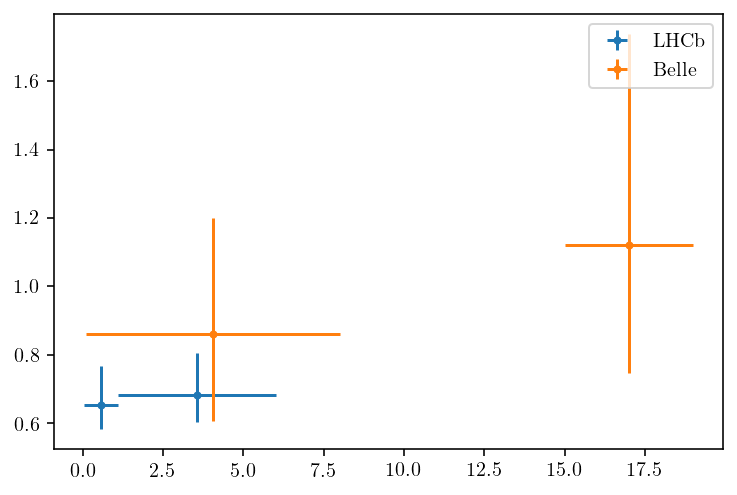

In [14]:
fpl.bin_plot_exp('<Rmue>(B0->K*ll)');
plt.legend();

## More plots

In [15]:
import matplotlib.pyplot as plt

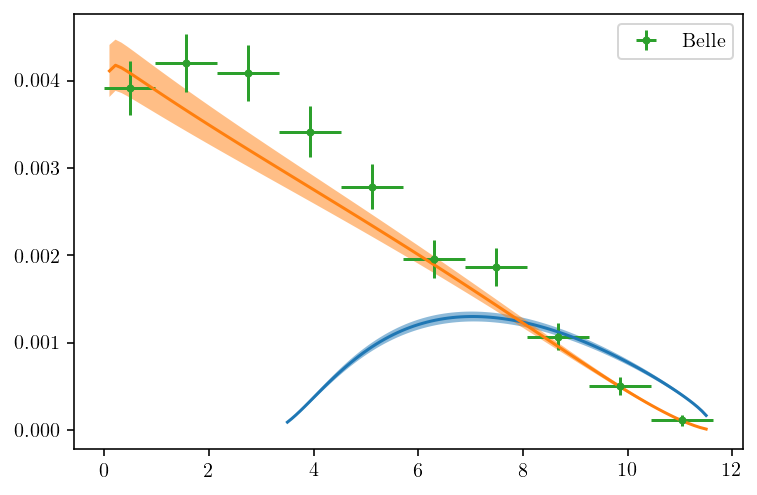

In [16]:
fpl.diff_plot_th_err('dBR/dq2(B0->Dtaunu)', 3.5, 11.5)
fpl.diff_plot_th_err('dBR/dq2(B0->Dmunu)', 0.1, 11.5)
fpl.bin_plot_exp('<BR>(B0->Dmunu)');
plt.legend();

## Modifying parameters

In [17]:
flavio.default_parameters.get_central('m_b')

4.195

In [18]:
flavio.default_parameters.get_1d_errors_rightleft()['m_b']

(0.014, 0.014)

In [19]:
flavio.sm_prediction('BR(B->Xcenu)')

0.1066592294971009

In [20]:
flavio.default_parameters.set_constraint('m_b', '4.2 +- 0.1')

In [21]:
flavio.sm_uncertainty('BR(B->Xcenu)')

0.015553751010734302

## New physics

In [22]:
from wilson import Wilson

In [23]:
w = Wilson({'C10_bsmumu': 0.5}, scale=4.8, eft='WET', basis='flavio')

In [24]:
flavio.np_prediction('BR(Bs->mumu)', w) / flavio.sm_prediction('BR(Bs->mumu)')

0.7755108884728887

... or in SMEFT:

In [25]:
w = Wilson({'lq1_2223': 0.5e-9}, scale=1000, eft='SMEFT', basis='Warsaw')
flavio.np_prediction('BR(Bs->mumu)', w) / flavio.sm_prediction('BR(Bs->mumu)')

0.8683386944526118

## Likelihoods

In [26]:
from flavio.statistics.likelihood import Likelihood

In [27]:
L = Likelihood(observables=['BR(B->Xsgamma)'])

In [28]:
def LL(x):
    ReC7, ImC7 = x
    par = flavio.default_parameters.get_central_all()
    wc = Wilson({'C7_bs': ReC7 + 1j * ImC7}, scale=4.8,
                eft='WET', basis='flavio')
    return L.log_likelihood(par, wc)

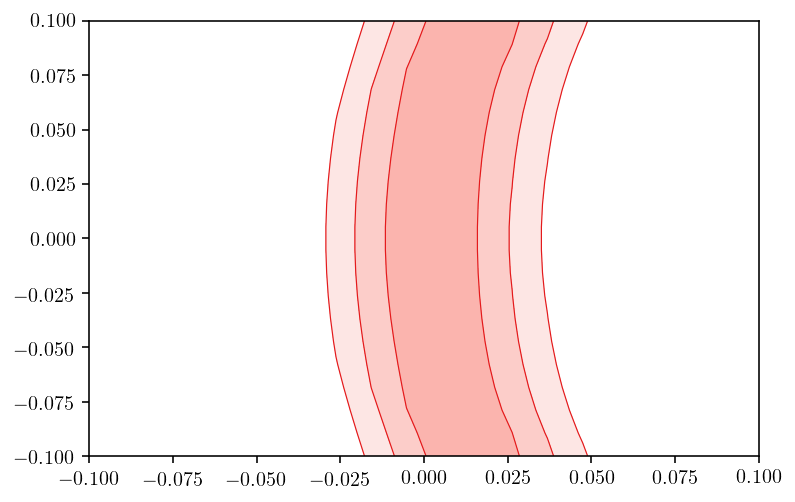

In [29]:
fpl.likelihood_contour(LL, -0.1, 0.1, -0.1, 0.1, n_sigma=(1, 2, 3));

## FastLikelihood

In [30]:
from flavio.statistics.likelihood import FastLikelihood

In [31]:
FL = FastLikelihood(name='bsgamma FastLikelihood',
                    observables=['BR(B->Xsgamma)'])

In [32]:
FL.make_measurement()

In [33]:
def FLL(x):
    ReC7, ImC7 = x
    par = flavio.default_parameters.get_central_all()
    wc = Wilson({'C7_bs': ReC7 + 1j * ImC7}, scale=4.8,
                eft='WET', basis='flavio')
    return FL.log_likelihood(par, wc)

In [34]:
flavio.physics.running.running.get_mb(flavio.default_parameters.get_central_all(), scale=120)

2.8127961283531184

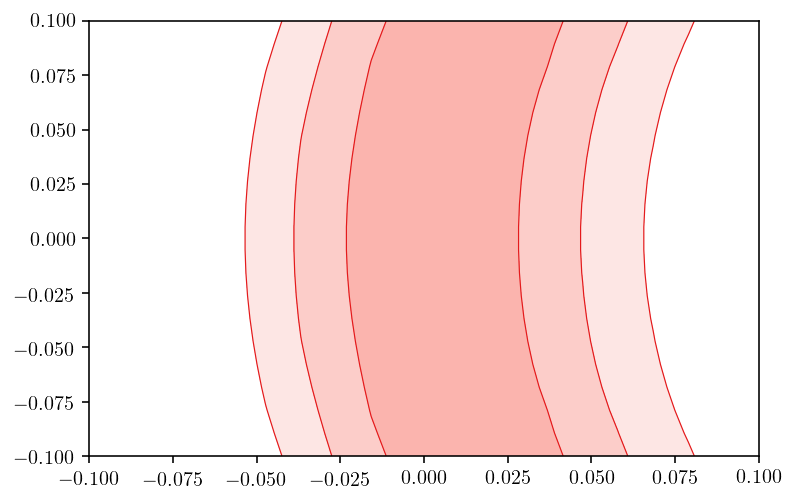

In [35]:
fpl.likelihood_contour(FLL, -0.1, 0.1, -0.1, 0.1, n_sigma=(1, 2, 3));